In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import skimage
#import LPR

In [2]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

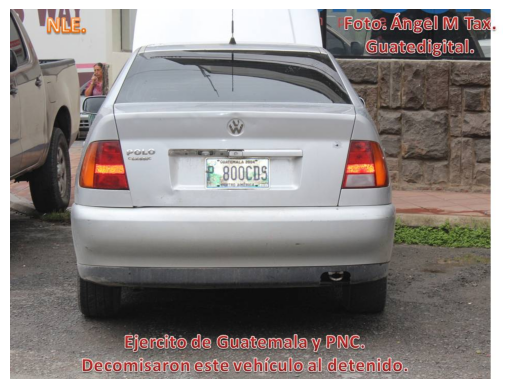

In [3]:
img = cv2.imread('./EJERCITO Y PNC2.jpg')
plot_image(img, False)

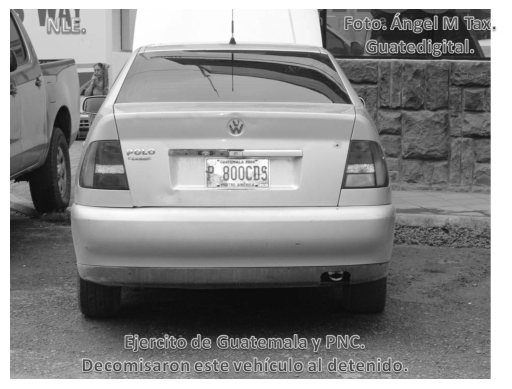

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray)

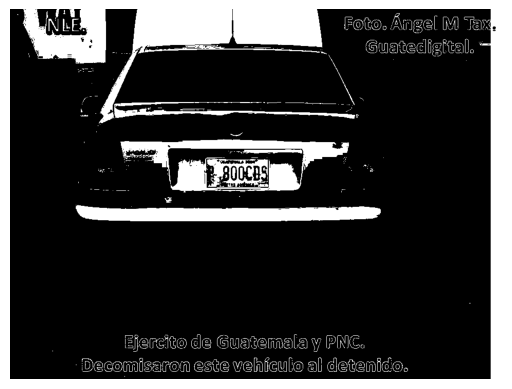

In [5]:
_, thresh = cv2.threshold(gray, 205, 255, cv2.THRESH_BINARY)
plot_image(thresh)

In [6]:
min_w=0.9999
max_w=12000
min_h=0.9999
max_h=12000
ratio=4.39

def filter_candidates(contours):
        candidates = []
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = float(w) / h
            if (np.isclose(aspect_ratio, ratio, atol=0.9) and
               (max_w > w > min_w) and
               (max_h > h > min_h)):
                candidates.append(cnt)
        return candidates
       

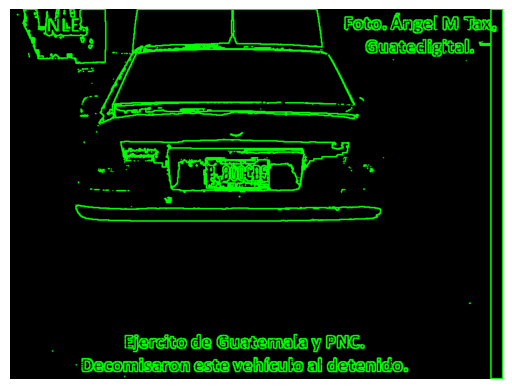

In [7]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

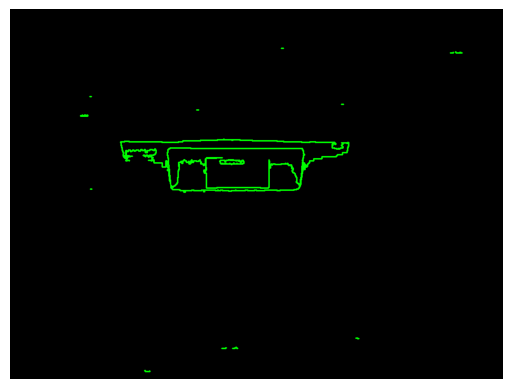

In [8]:
candidates = filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

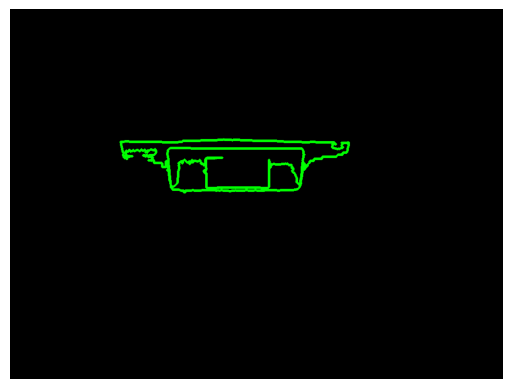

In [9]:
license = max(candidates, key=lambda cnt: cv2.boundingRect(cnt)[2])
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 3)
plt.axis('off')
plt.imshow(canvas);

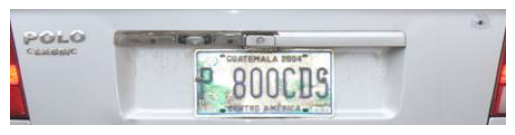

In [10]:
cropped = img[cv2.boundingRect(license)[1]:cv2.boundingRect(license)[1]+cv2.boundingRect(license)[3], cv2.boundingRect(license)[0]:cv2.boundingRect(license)[0]+cv2.boundingRect(license)[2]]
cropped2 = img[cv2.boundingRect(license)[1]:cv2.boundingRect(license)[1]+cv2.boundingRect(license)[3], cv2.boundingRect(license)[0]:cv2.boundingRect(license)[0]+cv2.boundingRect(license)[2]]
plot_image(cropped2, False)

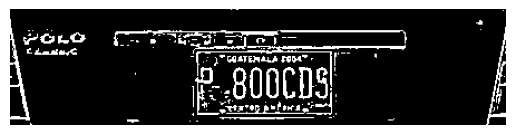

In [11]:
gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
thresh_cropped = cv2.adaptiveThreshold(gray_cropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY_INV, 7, 13)
plot_image(thresh_cropped)

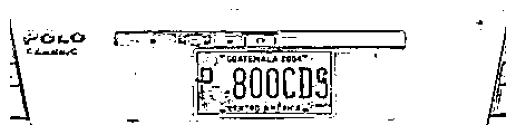

In [12]:
clear_border = skimage.segmentation.clear_border(thresh_cropped)
final = cv2.bitwise_not(thresh_cropped)
plot_image(final)

In [13]:
x,y,w,h = cv2.boundingRect(license)
alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += '--psm 11'
txt = pytesseract.image_to_string(thresh_cropped, config=options)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0),3)
cv2.putText(img,txt,  (x-20, y-10),1,2.2,(0,255,0),3)
print(txt[:2], txt[2:5], txt[5:])

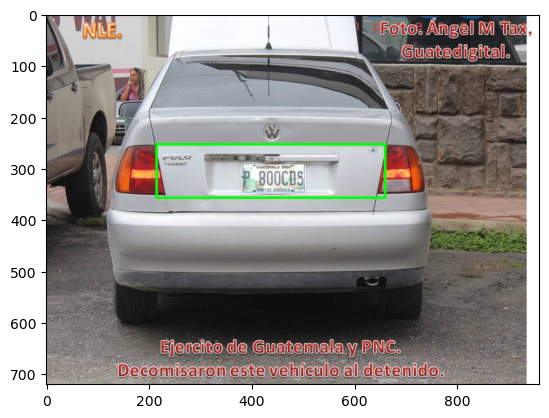

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))